In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

kidney_disease = pd.read_csv(r'Data/original_dataset.csv')
display(kidney_disease)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# Exploratory Data Analysis

### Shape

In [4]:
kidney_disease.shape

(400, 25)

The dataset has:
- 25 features
- 1 target
- 400 rows

## Features meaning

- Specific_gravity:  urine specific gravity results will fall [1.002 , 1.030] if your kidenys are functioning normally (determine how well your kidneys are diluting your urine).

    - Higher the number of specific gravity -> dehydrated
    - Lower the number of specific gravity ->  hydrated
    - Good health = [1.002 , 1.030]


- Albumin: is a protein found in the blood. A healthy kidney doesn’t let albumin pass from the blood into the urine. A damaged kidney lets some albumin pass into the urine. The less albumin in your urine, the better.


    - Good health = 0 (maybe)


- Red_blood_cells : (Anemia is common in people who have chronic kidney disease Anemia is common in people who have chronic kidney disease). Red blood cells are made by the bone marrow. To get the marrow to make red blood cells, the kidneys make a hormone called erythropoietin, or EPO. When the kidneys are damaged, they may not make enough EPO. Without enough EPO, the bone marrow does not make enough red blood cells, and you have anemia.


    - Normal -> good health
    - Abnormal -> sick
    

- Sugar :


    - 0 -> good health
    - 0 > (greater then 0) sick (not sure)
    

- Pus cells are a collection of dead, white blood cells that accumulates when the body’s immune system activates in response to an infection:


    - Normal -> small quantite in the urine (health person)
    - Abnormal -> not .. (maybe sick)


- pus_cell_clumps the present in the urine:


    - notpresent -> not sick 
    - present -> maybe sick
    

- Bacteria the present in the urine:


    - notpresent -> not sick (maybe)
    - present -> maybe sick
    
    

- blood_glucose_random the present in the urine:


    - the recommended targets for most people are:
        - Before meals: 90-130 mg/dL
        
        
    - Two hours after the start of a meal: Below 180 mg/dL
        - 90 – 180 -> maybe health
        - Else maybe sick



- blood urea : Urea nitrogen is a waste product that your kidneys remove from your blood. Higher than normal BUN levels may be a sign that your kidneys aren't working well:


    - 7 - 20 mg/dL is a normal level -> maybe healthy
    - Else maybe sick  
    

- pus_cell_clumps the present in the urine:


    - notpresent -> not sick 
    - present -> maybe sick


## Duplicate rows check

In [5]:
# Find duplicate rows
duplicates = kidney_disease[kidney_disease.duplicated()]

# Print the duplicate rows
display(duplicates)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification


**Conclusion**
- No duplicates

## Features and target type

In [6]:
kidney_disease.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
classification              object
dtype: object

**Conclusion :**
- We need to handle the features with an object type and convert them to number types (int, float)

## Feature types handling

For each columns that have an object type, we check the unique values

In [4]:
for col in kidney_disease:
    if(kidney_disease[col].dtype==object):
        print(col+'\t', kidney_disease[col].unique())

rbc	 [nan 'normal' 'abnormal']
pc	 ['normal' 'abnormal' nan]
pcc	 ['notpresent' 'present' nan]
ba	 ['notpresent' 'present' nan]
pcv	 ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
wc	 ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5

**Conclusion:**
    - classification , coronary_artery_disease , diabetes_mellitus : need to change an correct format like ckd\t become ckd (Noisy)
    - red_blood_cell_count , white_blood_cell_count , packed_cell_volume : need to be converted to number

## Percentage of null value

In [11]:
(kidney_disease.isnull().sum() / len(kidney_disease))*100

age                         2.25
blood_pressure              3.00
specific_gravity           11.75
albumin                    11.50
sugar                      12.25
red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
sodium                     21.75
potassium                  22.00
hemoglobin                 13.00
packed_cell_volume         17.75
white_blood_cell_count     26.50
red_blood_cell_count       32.75
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
peda_edema                  0.25
aanemia                     0.25
classification              0.00
dtype: float64

In [12]:
kidney_disease.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
classification              object
dtype: object

**Need first to handle empty value before doing correleation because we have some high pourcentage**

## Null values handling


## Features correlation

/var/folders/kb/r4xjj9lx7lj02x3fwd6xr4zh0000gn/T/ipykernel_38692/3470808754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(kidney_disease.corr(), vmin=-1, vmax=1, annot=True)


<Axes: >

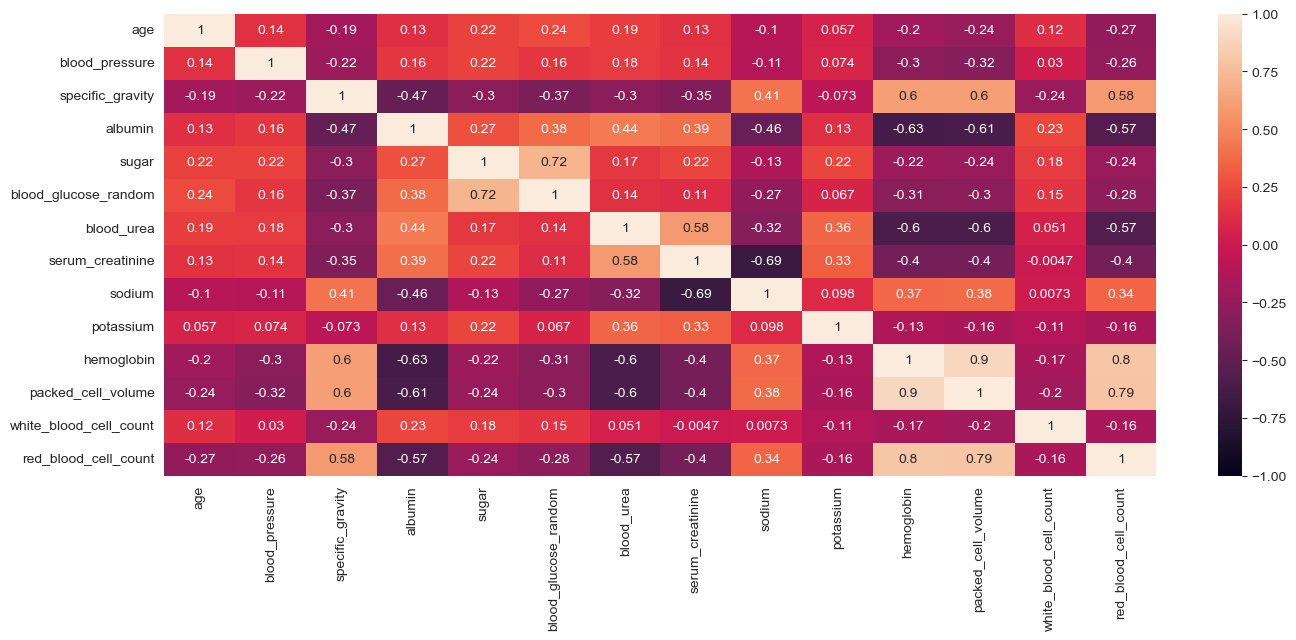

In [21]:
plt.figure(figsize=(16, 6))
sns.heatmap(kidney_disease.corr(), vmin=-1, vmax=1, annot=True)